In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
Vp = 1.0  # Volume of Plug Flow Reactor
Vm = 1.0  # Volume of Mixed Flow Reactor
Q = 1.0   # Volumetric flow rate

In [34]:

tau_p = Vp / Q  # Residence time for PFR
tau_m = Vm / Q  # Residence time for MFR

In [35]:
def E_pfr(t, tau_p):
    return np.where(np.isclose(t, tau_p, atol=1e-3), 1 / 1e-3, 0)

In [36]:
def E_mfr(t, tau_m):
    return np.where(t >= 0, (1 / tau_m) * np.exp(-t / tau_m), 0)

In [37]:
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]  # Time step size

In [38]:
def E_case1(t, tau_p, tau_m):
    E1 = E_pfr(t, tau_p)
    E2 = E_mfr(t, tau_m)
    return np.convolve(E1, E2, mode='full')[:len(t)] * dt

In [39]:
def E_case2(t, tau_p, tau_m):
    E1 = E_mfr(t, tau_m)
    E2 = E_pfr(t, tau_p)
    return np.convolve(E1, E2, mode='full')[:len(t)] * dt

In [40]:
E1 = E_case1(t, tau_p, tau_m)
E2 = E_case2(t, tau_p, tau_m)

In [41]:
E1 /= np.sum(E1) * dt
E2 /= np.sum(E2) * dt

In [42]:
area1 = np.sum(E1) * dt
area2 = np.sum(E2) * dt

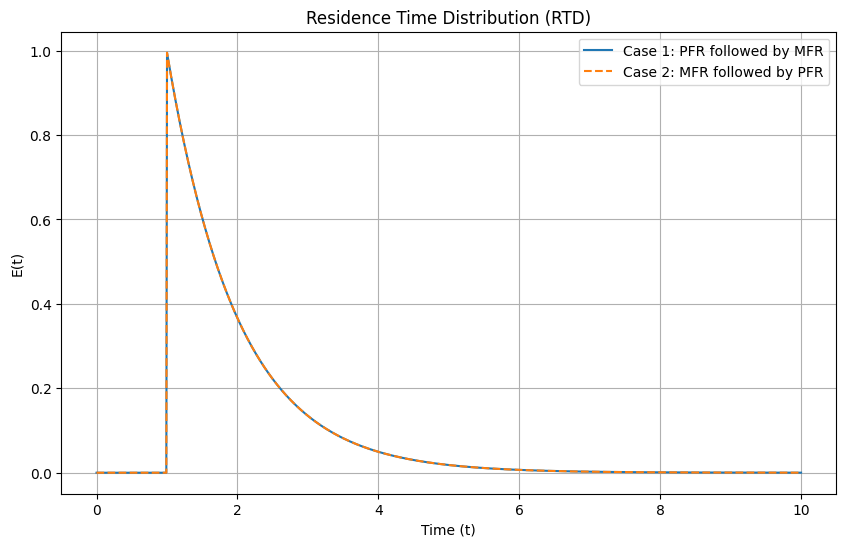

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(t, E1, label='Case 1: PFR followed by MFR')
plt.plot(t, E2, label='Case 2: MFR followed by PFR', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('E(t)')
plt.title('Residence Time Distribution (RTD)')
plt.legend()
plt.grid()
plt.show()

In [44]:
print(f"Area under RTD curve for Case 1 (PFR -> MFR): {area1}")
print(f"Area under RTD curve for Case 2 (MFR -> PFR): {area2}")

if np.isclose(area1, area2, atol=1e-3):
    print("Areas are approximately the same.")
else:
    if area1 > area2:
        print("Case 1 (PFR -> MFR) has a larger area.")
    else:
        print("Case 2 (MFR -> PFR) has a larger area.")

Area under RTD curve for Case 1 (PFR -> MFR): 0.9999999999999999
Area under RTD curve for Case 2 (MFR -> PFR): 0.9999999999999999
Areas are approximately the same.
